<a href="https://colab.research.google.com/github/josesg998/redesn_2024/blob/main/Clase%201/Ejercicio_2b.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
import csv
import numpy as np
import librosa
import matplotlib.pyplot as plt
import keras

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
# Para descomprimir el archivo Neumonia.zip (Si se usa desde Colab)
# Creará dos carpetas:
#     "test"
#     "train"
# y dos archivos en el directorio donde se descomprima:
#     "test.csv"
#     "train.csv"

!unzip "/content/drive/MyDrive/Perros_y_gatos.zip" -d "."
drive.flush_and_unmount()

Archive:  /content/drive/MyDrive/Perros_y_gatos.zip
   creating: ./test/
  inflating: ./test.csv              
   creating: ./test/cat/
  inflating: ./test/cat/cat_110.wav  
  inflating: ./test/cat/cat_112.wav  
  inflating: ./test/cat/cat_115.wav  
  inflating: ./test/cat/cat_126.wav  
  inflating: ./test/cat/cat_129.wav  
  inflating: ./test/cat/cat_130.wav  
  inflating: ./test/cat/cat_133.wav  
  inflating: ./test/cat/cat_135.wav  
  inflating: ./test/cat/cat_137.wav  
  inflating: ./test/cat/cat_14.wav   
  inflating: ./test/cat/cat_143.wav  
  inflating: ./test/cat/cat_144.wav  
  inflating: ./test/cat/cat_148.wav  
  inflating: ./test/cat/cat_152.wav  
  inflating: ./test/cat/cat_158.wav  
  inflating: ./test/cat/cat_17.wav   
  inflating: ./test/cat/cat_20.wav   
  inflating: ./test/cat/cat_24.wav   
  inflating: ./test/cat/cat_28.wav   
  inflating: ./test/cat/cat_29.wav   
  inflating: ./test/cat/cat_3.wav    
  inflating: ./test/cat/cat_36.wav   
  inflating: ./test/cat/cat_

Longitud del vector de muestras del archivo: 379265




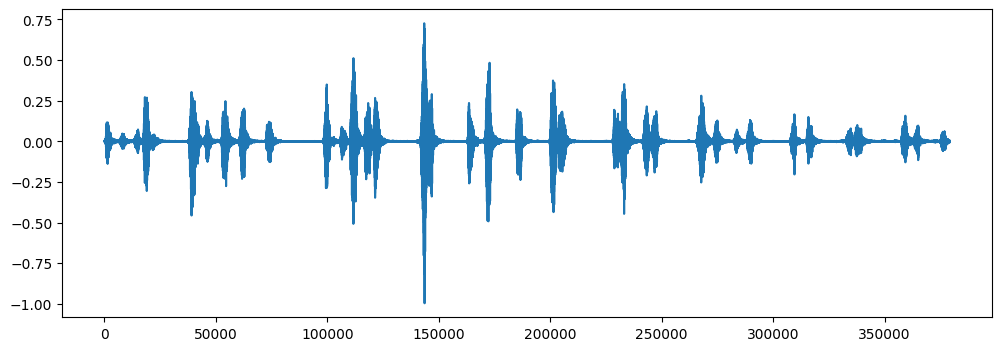

In [7]:
# Lectura y visualización de un archivo de audio

sfile = "train/dog/dog_barking_0.wav"

audio_data, sample_rate = librosa.load(sfile)

print("Longitud del vector de muestras del archivo: " + str(len(audio_data)) + "\n\n")

fig = plt.figure(figsize=(12, 4))
plt.plot(audio_data)
plt.show()

In [8]:
# Lectura del dataset completo de train
trainfile = csv.reader(open("train.csv"), delimiter='\t')
trainrows = [[c for c in row] for row in trainfile]
row_count_train = len(trainrows)
T_train = [int(c[0]) for c in trainrows]
wavfiles = np.array(trainrows)[:, 1]

#Prep 1 <BR>
Creación del dataset dividiendo cada archivo de audio en distintas "porciones" de igual longitud.

In [9]:
longitud_porcion = 10000

P = []  ; T = []
for i in range(len(wavfiles)):
    audio_data, sample_rate = librosa.load(wavfiles[i])

    longitud = len(audio_data)
    comienzo = 0
    while (comienzo+longitud_porcion) < longitud:
      data = audio_data[comienzo:(comienzo+longitud_porcion)]
      comienzo+= longitud_porcion

      P.append(data)
      T.append(T_train[i])

P = np.array(P)
T = np.array(T)

#Prep 2<BR>
Creación del dataset utilizando características espectrales de las señales de audio.


In [10]:
# Codificación a utilizar (puede probar con una de ellas, un subconjunto o todas a la vez)

codificacion = []
codificacion.append("mfcc")    # Cepstral coefficients
#codificacion.append("stft")    # Short-Time Fourier Transform and Chroma Features
#codificacion.append("mels")    # Melspectrogram
#codificacion.append("cont")    # Spectral contrast
#codificacion.append("tonn")    # Tonnetz
#codificacion.append("cent")    # Spectral centroids
#codificacion.append("band")    # Spectral bandwidth
#codificacion.append("roll")    # Spectral rolloff
#codificacion.append("zcrt")    # Zero crossing rate

P = None ; T = []
for i in range(len(wavfiles)):
    audio_data, sample_rate = librosa.load(wavfiles[i])
    stft = np.abs(librosa.stft(audio_data))

    features = None

    if "mfcc" in codificacion:
      a = librosa.feature.mfcc(y=audio_data, sr=sample_rate, n_mfcc=40).T
      if features is None:
        features = a
      else:
        features = np.concatenate((features, a), axis=1)

    if "stft" in codificacion:
      a = librosa.feature.chroma_stft(S=stft, sr=sample_rate).T
      if features is None:
        features = a
      else:
        features = np.concatenate((features, a), axis=1)

    if "mels" in codificacion:
      a = librosa.feature.melspectrogram(audio_data, sr=sample_rate).T
      if features is None:
        features = a
      else:
        features = np.concatenate((features, a), axis=1)

    if "cont" in codificacion:
      a = librosa.feature.spectral_contrast(S=stft, sr=sample_rate).T
      if features is None:
        features = a
      else:
        features = np.concatenate((features, a), axis=1)

    if "tonn" in codificacion:
      a = librosa.feature.tonnetz(y=librosa.effects.harmonic(audio_data, ), sr=sample_rate).T
      if features is None:
        features = a
      else:
        features = np.concatenate((features, a), axis=1)

    if "cent" in codificacion:
      a = librosa.feature.spectral_centroid(y=audio_data, sr=sample_rate).T
      if features is None:
        features = a
      else:
        features = np.concatenate((features, a), axis=1)

    if "band" in codificacion:
      a = librosa.feature.spectral_bandwidth(y=audio_data, sr=sample_rate).T
      if features is None:
        features = a
      else:
        features = np.concatenate((features, a), axis=1)

    if "roll" in codificacion:
      a = librosa.feature.spectral_rolloff(y=audio_data, sr=sample_rate).T
      if features is None:
        features = a
      else:
        features = np.concatenate((features, a), axis=1)

    if "zcrt" in codificacion:
      a = librosa.feature.zero_crossing_rate(audio_data).T
      if features is None:
        features = a
      else:
        features = np.concatenate((features, a), axis=1)

    for j in range(features.shape[0]):
      if P is None:
        P = features
      else:
        P = np.concatenate( (P, features[j,:][np.newaxis]) , axis = 0)
      T.append(T_train[i])

T = np.array(T)

#Prep 3<BR>
Creación del dataset utilizando el promedio de las características espectrales de las señales de audio.
Simplifica la tarea de testing, ya que se genera un único vector de features por archivo.

In [11]:
P = [] ; T = []
for i in range(len(wavfiles)):
    audio_data, sample_rate = librosa.load(wavfiles[i])
    stft = np.abs(librosa.stft(audio_data))

    features = []

    if "mfcc" in codificacion:
      a = librosa.feature.mfcc(y=audio_data, sr=sample_rate, n_mfcc=40).T
      if features is None:
        features = np.mean(a, axis=0)
      else:
        features = np.concatenate( (features, np.mean(a, axis=0)) )

    if "stft" in codificacion:
      a = librosa.feature.chroma_stft(S=stft, sr=sample_rate).T
      if features is None:
        features = np.mean(a, axis=0)
      else:
        features = np.concatenate( (features, np.mean(a, axis=0)) )

    if "mels" in codificacion:
      a = librosa.feature.melspectrogram(audio_data, sr=sample_rate).T
      if features is None:
        features = np.mean(a, axis=0)
      else:
        features = np.concatenate( (features, np.mean(a, axis=0)) )

    if "cont" in codificacion:
      a = librosa.feature.spectral_contrast(S=stft, sr=sample_rate).T
      if features is None:
        features = np.mean(a, axis=0)
      else:
        features = np.concatenate( (features, np.mean(a, axis=0)) )

    if "tonn" in codificacion:
      a = librosa.feature.tonnetz(y=librosa.effects.harmonic(audio_data, ), sr=sample_rate).T
      if features is None:
        features = np.mean(a, axis=0)
      else:
        features = np.concatenate( (features, np.mean(a, axis=0)) )

    if "cent" in codificacion:
      a = librosa.feature.spectral_centroid(y=audio_data, sr=sample_rate).T
      if features is None:
        features = np.mean(a, axis=0)
      else:
        features = np.concatenate( (features, np.mean(a, axis=0)) )

    if "band" in codificacion:
      a = librosa.feature.spectral_bandwidth(y=audio_data, sr=sample_rate).T
      if features is None:
        features = np.mean(a, axis=0)
      else:
        features = np.concatenate( (features, np.mean(a, axis=0)) )

    if "roll" in codificacion:
      a = librosa.feature.spectral_rolloff(y=audio_data, sr=sample_rate).T
      if features is None:
        features = np.mean(a, axis=0)
      else:
        features = np.concatenate( (features, np.mean(a, axis=0)) )

    if "zcrt" in codificacion:
      a = librosa.feature.zero_crossing_rate(audio_data).T
      if features is None:
        features = np.mean(a, axis=0)
      else:
        features = np.concatenate( (features, np.mean(a, axis=0)) )

    P.append(features)
    T.append(T_train[i])

P = np.array(P)
T = np.array(T)
print(P.shape)

(210, 40)


#Entrenamiento del modelo
Solo usar una preparación de los datos (Prep1 o Prep2 o Prep3)

In [12]:
# Mezclar las muestras
inds = np.arange(len(T))
inds = np.random.permutation(inds)
P = P[inds]
T = T[inds]
print(P.shape)
print(T.shape)

(210, 40)
(210,)


In [13]:
d_in = P.shape[1]
d_out = 1 # Clasificación binaria

modelo = keras.Sequential([
    keras.layers.Dense(5, input_shape=(d_in,), activation= 'tanh'),
    keras.layers.Dense(d_out, activation="sigmoid")
])

modelo.compile(
  optimizer = keras.optimizers.SGD(learning_rate=0.01),
  loss = 'binary_crossentropy', metrics = ['accuracy']
)

modelo.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 5)                 205       
                                                                 
 dense_1 (Dense)             (None, 1)                 6         
                                                                 
Total params: 211 (844.00 Byte)
Trainable params: 211 (844.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [14]:
history = modelo.fit(P, T, epochs=3, batch_size=16, verbose=True, validation_split=0.2)

Epoch 1/3
11/11 [==============================] - 1s 27ms/step - loss: 0.7929 - accuracy: 0.5595 - val_loss: 0.6006 - val_accuracy: 0.6190
Epoch 2/3
11/11 [==============================] - 0s 6ms/step - loss: 0.6809 - accuracy: 0.5833 - val_loss: 0.6818 - val_accuracy: 0.5952
Epoch 3/3
11/11 [==============================] - 0s 7ms/step - loss: 0.6914 - accuracy: 0.5833 - val_loss: 0.6811 - val_accuracy: 0.5952
